<a href="https://colab.research.google.com/github/yeesem/Deep_Learning/blob/main/Build_a_Multi_output_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input
from sklearn.model_selection import train_test_split

In [22]:
def format_output(data):
  y1 = data.pop('Y1')
  y1 = np.array(y1)
  y2 = data.pop('Y2')
  y2 = np.array(y2)
  return y1,y2

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()

def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()


# Prepare the Data

In [46]:
!git clone https://github.com/yeesem/Machine-Learning-Datasets

%cd Folder

fatal: destination path 'Machine-Learning-Datasets' already exists and is not an empty directory.
[Errno 2] No such file or directory: 'Folder'
/content/WIX3001---NN-Assignment


In [48]:
# Use pandas excel reader
df = pd.read_excel("/content/WIX3001---NN-Assignment/Machine-Learning-Datasets/ENB2012_data.xlsx")
#  it means the entire DataFrame will be sampled.
#  Essentially, it shuffles the rows of the DataFrame randomly.
df = df.sample(frac=1).reset_index(drop=True)

In [49]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.90,563.5,318.5,122.5,7.0,5,0.40,2,35.69,40.66
1,0.82,612.5,318.5,147.0,7.0,5,0.10,1,22.58,28.51
2,0.64,784.0,343.0,220.5,3.5,5,0.10,3,15.36,19.29
3,0.76,661.5,416.5,122.5,7.0,5,0.40,1,40.43,39.48
4,0.66,759.5,318.5,220.5,3.5,2,0.25,5,12.93,15.83


In [56]:
#  Split the data into train and test with 80 trains / 20 tests
train,test = train_test_split(df,test_size = 0.2)
train_stats = train.describe()

# Get Y1 and Y2 as the 2 outputs and format them as np arrays
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

# Normalize the training and testing data
norm_train_X = norm(train)
norm_test_X = norm(test)

# Build the model

In [57]:
# Define the model layers
input_layer = Input(shape = (len(train.columns),))
first_dense = Dense(units = 128,activation = 'relu')(input_layer)
second_dense = Dense(units = 128,activation = 'relu')(first_dense)

# Y1 output will be fed directly from the second dense
y1_output = Dense(units = 1,name = 'y1_output')(second_dense)
third_dense = Dense(units = 64,activation = 'relu')(second_dense)

# Y2 output will come via third dense
y2_output = Dense(units = 1,name = 'y2_output')(third_dense)

# Define the model with the input layer and a list of output layers
model = Model(inputs = input_layer,outputs = [y1_output,y2_output])

print(model.summary())

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_12 (Dense)            (None, 128)                  1152      ['input_5[0][0]']             
                                                                                                  
 dense_13 (Dense)            (None, 128)                  16512     ['dense_12[0][0]']            
                                                                                                  
 dense_14 (Dense)            (None, 64)                   8256      ['dense_13[0][0]']            
                                                                                            

# Configure parameters


In [60]:
# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss={'y1_output': 'mse', 'y2_output': 'mse'},
              metrics={'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output': tf.keras.metrics.RootMeanSquaredError()})

# Train the model

In [61]:
# Train the model for 500 epochs
history = model.fit(norm_train_X, train_Y,
                    epochs=500, batch_size=10, validation_data=(norm_test_X, test_Y))

Epoch 1/500
62/62 [==============================] - 2s 9ms/step - loss: 142.9871 - y1_output_loss: 71.0419 - y2_output_loss: 71.9452 - y1_output_root_mean_squared_error: 8.4286 - y2_output_root_mean_squared_error: 8.4821 - val_loss: 97.5212 - val_y1_output_loss: 27.0238 - val_y2_output_loss: 70.4974 - val_y1_output_root_mean_squared_error: 5.1984 - val_y2_output_root_mean_squared_error: 8.3963
Epoch 2/500
62/62 [==============================] - 0s 3ms/step - loss: 30.7056 - y1_output_loss: 12.4651 - y2_output_loss: 18.2405 - y1_output_root_mean_squared_error: 3.5306 - y2_output_root_mean_squared_error: 4.2709 - val_loss: 137.7755 - val_y1_output_loss: 31.1195 - val_y2_output_loss: 106.6561 - val_y1_output_root_mean_squared_error: 5.5785 - val_y2_output_root_mean_squared_error: 10.3274
Epoch 3/500
62/62 [==============================] - 0s 3ms/step - loss: 30.5628 - y1_output_loss: 11.7854 - y2_output_loss: 18.7773 - y1_output_root_mean_squared_error: 3.4330 - y2_output_root_mean_squ

# Evaluate the Model and Plot Metrics

In [62]:
# Test the model and print loss and mse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

5/5 [==============================] - 0s 3ms/step - loss: 1.1362 - y1_output_loss: 0.1619 - y2_output_loss: 0.9743 - y1_output_root_mean_squared_error: 0.4024 - y2_output_root_mean_squared_error: 0.9871
Loss = 1.1362428665161133, Y1_loss = 0.16193445026874542, Y1_mse = 0.4024108052253723, Y2_loss = 0.9743085503578186, Y2_mse = 0.9870706796646118


5/5 [==============================] - 0s 3ms/step


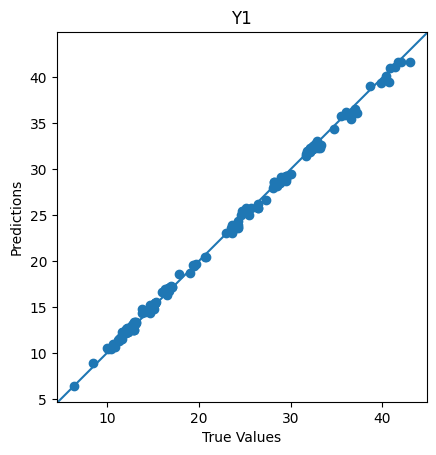

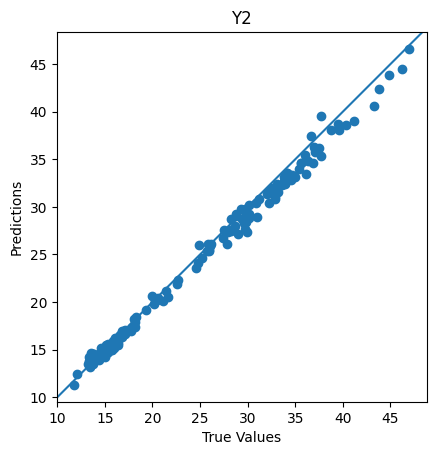

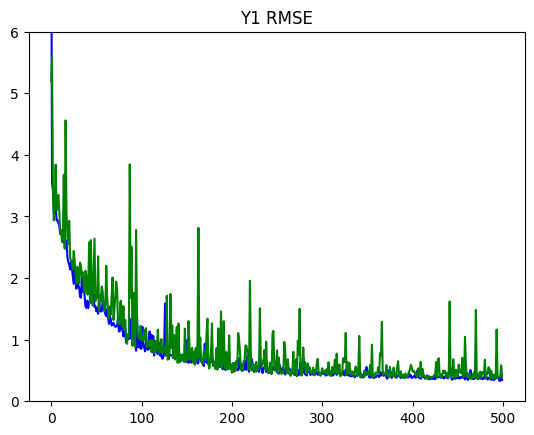

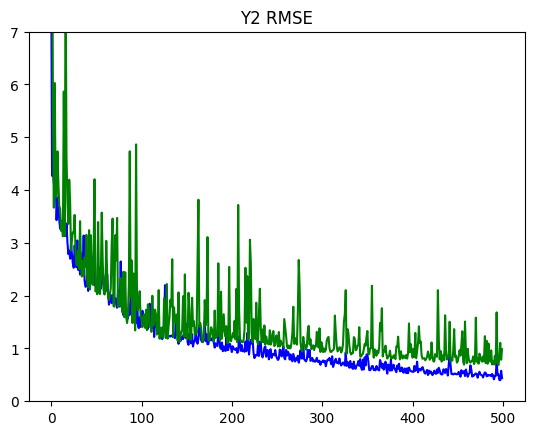

In [63]:
# Plot the loss and mse
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title='Y1')
plot_diff(test_Y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)